In [17]:
import matplotlib.colors
from sklearn.datasets import make_blobs
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score
import pandas as pd
import matplotlib.pyplot as plt

X, labels_true = make_blobs(1000)
data = pd.DataFrame(X)

In [18]:
mbk = MiniBatchKMeans(n_clusters=2)
km = KMeans(n_clusters=2)
dbsc = DBSCAN()

In [19]:
dblabels = dbsc.fit(X)
adjusted_rand_score(labels_true, dblabels.labels_)

0.9239029310767487

In [20]:
kmlabels = km.fit(X)
adjusted_rand_score(labels_true, kmlabels.labels_)

/home/mischa/PycharmProjects/GooglePlay/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.5705711831835333

In [21]:
mbklabels = mbk.fit(X, )
adjusted_rand_score(labels_true, mbklabels.labels_)

/home/mischa/PycharmProjects/GooglePlay/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.5705711831835333

In [22]:
import numpy as np
np.unique(dblabels.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3]), array([ 43, 315, 317, 318,   7]))

In [23]:
dblabels.labels_

array([ 0,  0,  1,  0,  1,  2,  1,  0, -1,  2,  1,  0,  0,  0,  1,  1,  2,
        1,  0,  0,  0,  0,  2,  1,  0,  1,  1,  0,  1,  1,  2,  1,  0,  1,
        1, -1,  2,  0,  0,  2,  0,  2,  0,  0, -1,  0,  2,  2,  0,  0,  2,
        2,  2,  2,  1,  0,  2,  1,  0,  2,  2,  0,  1,  0,  0,  1,  2,  2,
        1,  2,  1,  2,  2,  1,  0,  2,  1,  1,  1,  1,  0,  0,  1, -1,  2,
        2,  2,  1,  2,  2,  1,  1,  2,  2,  0,  0,  0,  2,  1,  2,  2,  0,
        0,  1,  1,  2,  2,  2,  2,  0,  0,  1,  1,  1,  1,  2,  0,  2,  0,
        0,  0,  1,  0,  2,  1,  3,  2,  1,  0,  1,  0,  0,  0,  1,  2,  1,
        0,  2,  0,  1,  1,  1,  1,  1,  1,  2,  1,  0,  0,  2,  2,  1,  2,
        2,  1,  0,  0,  1,  2,  2,  1,  1,  2,  2,  2,  1,  2,  0,  1,  2,
        2,  0, -1,  0,  0,  1,  1,  2, -1,  2,  1,  1,  0,  2,  0,  0,  2,
        1,  1, -1,  0,  1,  0,  0,  1,  2,  2,  1,  0,  2,  1,  2,  2,  1,
        1,  1,  2,  2,  2,  1,  1,  2, -1,  0,  2,  0,  2,  1,  1,  1,  1,
        0,  1,  0,  2,  1

In [24]:
data.head()

,0,1
0,-0.715027,0.267132
1,-1.363041,-0.594780
2,8.825499,4.917037
3,-1.168222,-1.650316
4,9.472240,2.095244


In [25]:
for i in range(len(dblabels.labels_)):
    if dblabels.labels_[i] == 2:
        print(data.iloc[i])

0   -0.856369
1   -7.120114
Name: 5, dtype: float64
0   -1.471266
1   -6.396753
Name: 9, dtype: float64
0   -1.742569
1   -7.217214
Name: 16, dtype: float64
0   -0.136502
1   -8.385785
Name: 22, dtype: float64
0   -1.251471
1   -5.870318
Name: 30, dtype: float64
0    0.587067
1   -7.046638
Name: 36, dtype: float64
0   -1.673728
1   -6.604359
Name: 39, dtype: float64
0   -0.693934
1   -8.196981
Name: 41, dtype: float64
0    1.150492
1   -7.544425
Name: 46, dtype: float64
0   -2.237127
1   -6.959752
Name: 47, dtype: float64
0   -0.521984
1   -5.259010
Name: 50, dtype: float64
0   -0.859153
1   -7.029926
Name: 51, dtype: float64
0   -0.831778
1   -7.216609
Name: 52, dtype: float64
0   -0.700319
1   -7.651949
Name: 53, dtype: float64
0   -0.894780
1   -7.638947
Name: 56, dtype: float64
0   -1.122179
1   -7.484131
Name: 59, dtype: float64
0    0.168954
1   -6.422495
Name: 60, dtype: float64
0   -1.316449
1   -7.188559
Name: 66, dtype: float64
0   -0.640070
1   -8.408853
Name: 67, dtype: flo

In [26]:
data.insert(2, "labels", dblabels.labels_)
data.head()
data.labels = data.labels.apply(lambda x: str(x))

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0       green
1       green
2      yellow
3       green
4      yellow
        ...  
995      blue
996      blue
997     green
998     green
999    yellow
Name: labels, Length: 1000, dtype: object

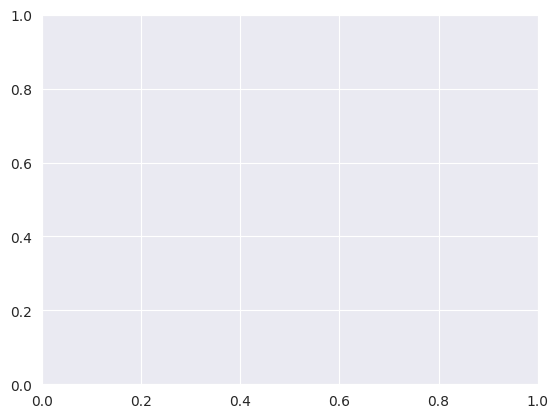

In [29]:
import matplotlib
colors = {"-1":"red", "0":"green", "1":"yellow", "2":"blue"}

plt.scatter(data[0], data[1], c=pd.Series(data["labels"].map(colors)))